In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [ ]:
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

display(df_red.info(),df_white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

None

None

In [ ]:
display(df_red.describe(),df_white.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


$\textbf{Checking for outlier.Calculating z-score and removing rows with z-score >|3|}$

In [ ]:
z_red = np.abs(stats.zscore(df_red))
z_white = np.abs(stats.zscore(df_white))

df_red = df_red[(z_red<3).all(axis=1)]
df_white = df_white[(z_white<3).all(axis=1)]

print(df_red.shape)
print(df_white.shape)


(1451, 12)
(4487, 12)


$\textbf{Checking the correlation}$

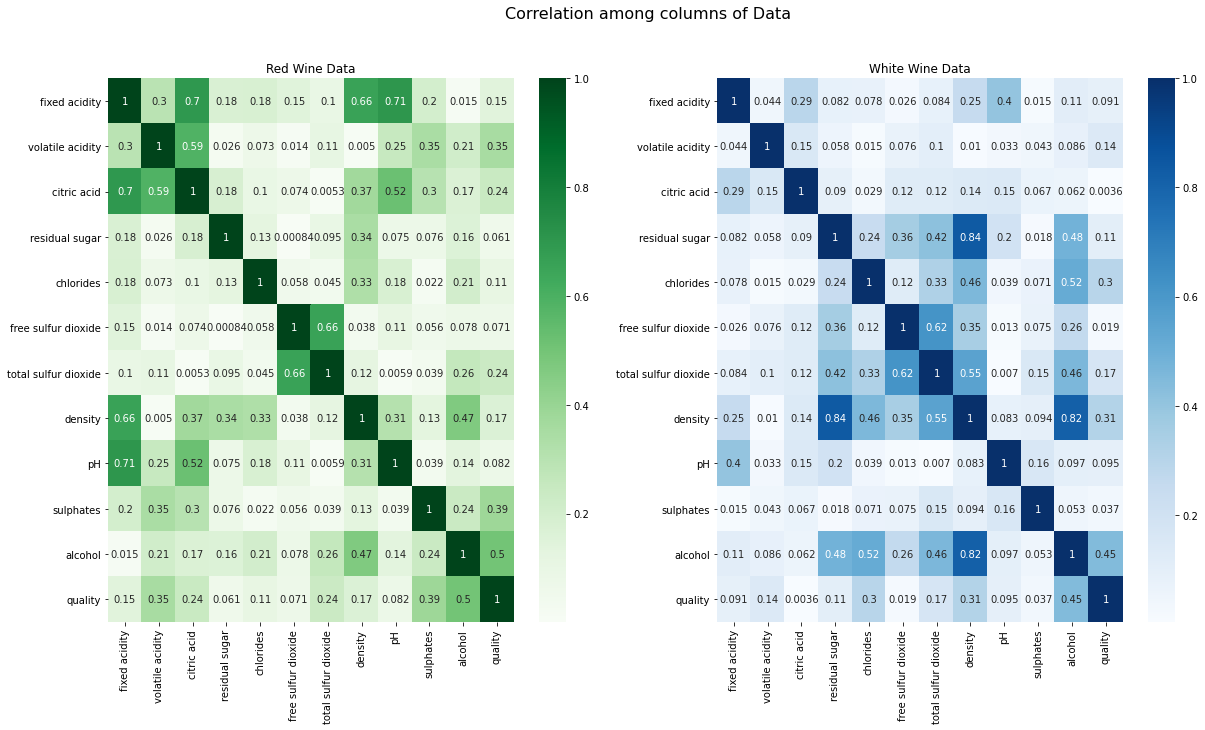

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.heatmap(abs(df_red.corr()), cmap='Greens', annot=True,ax=ax[0],label ='Red Wine')
sns.heatmap(abs(df_white.corr()), cmap='Blues', annot=True,ax=ax[1],label ='White Wine')
ax[0].set_title('Red Wine Data')
ax[1].set_title('White Wine Data')
fig.suptitle("Correlation among columns of Data", fontsize=16)
plt.show()

$\large\textbf{Explanatory Data Analysis}$

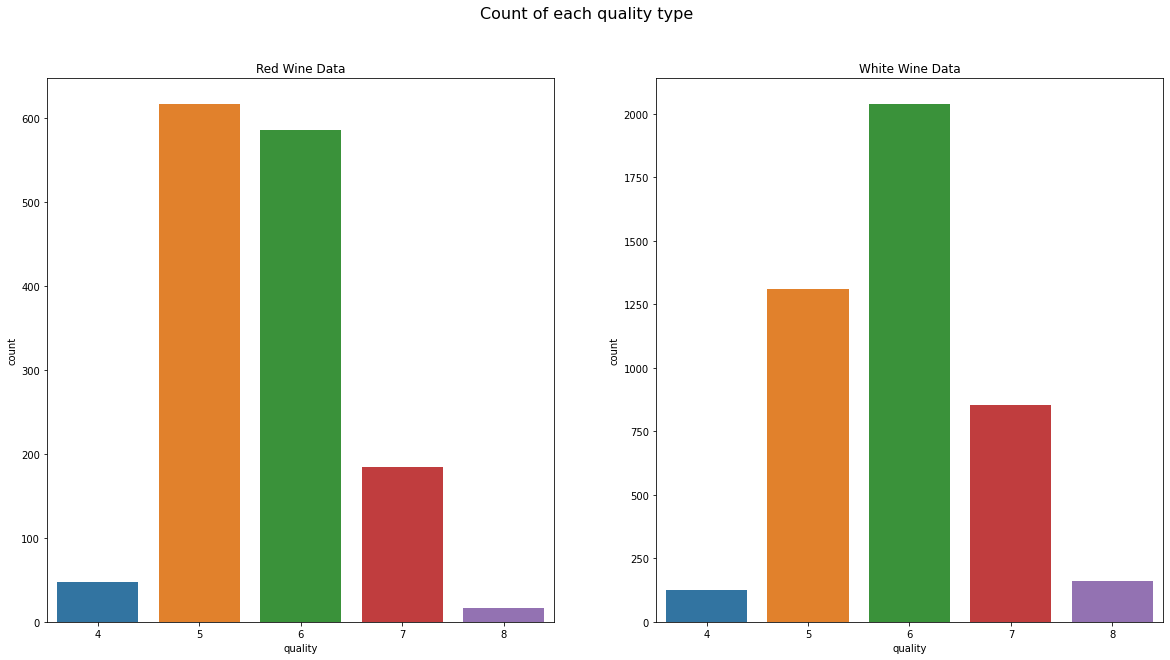

In [ ]:



fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x= 'quality', data=df_red, ax=ax[0])
sns.countplot(x ='quality', data=df_white, ax=ax[1])
ax[0].set_title('Red Wine Data')
ax[1].set_title('White Wine Data')
fig.suptitle("Count of each quality type", fontsize=16)
plt.show()


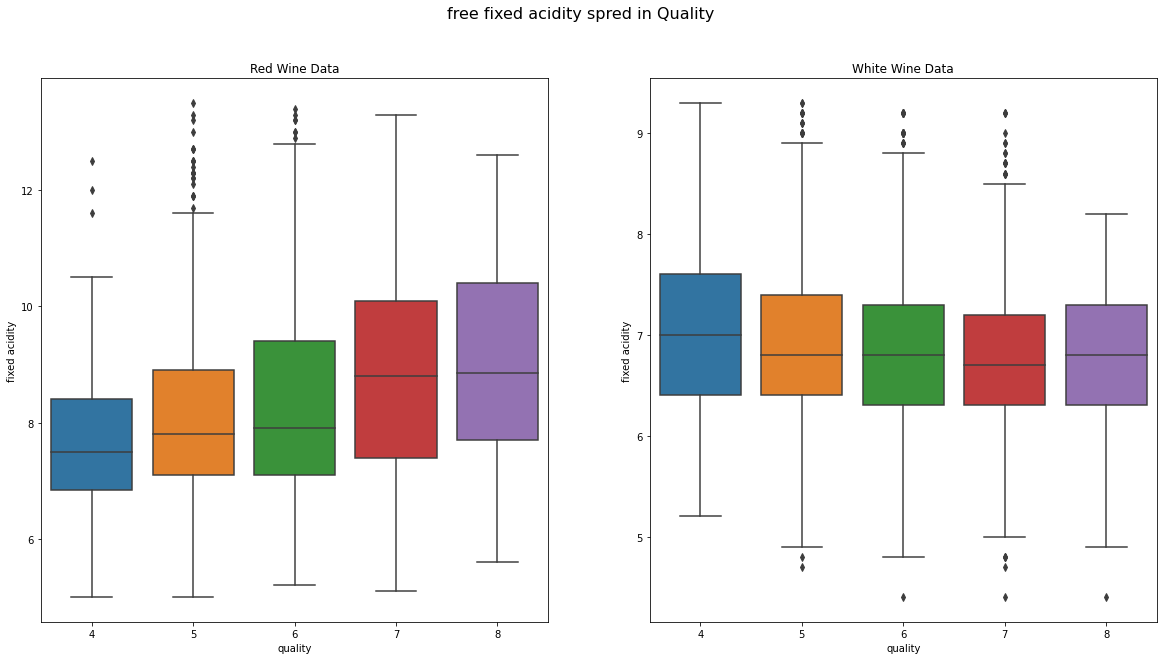

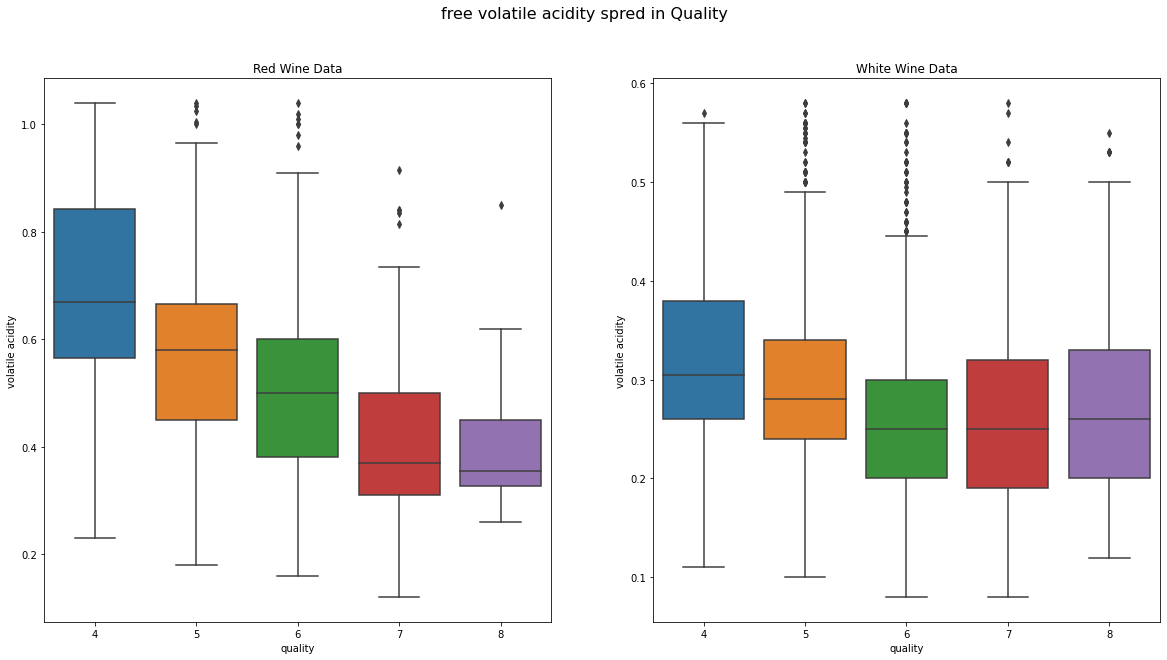

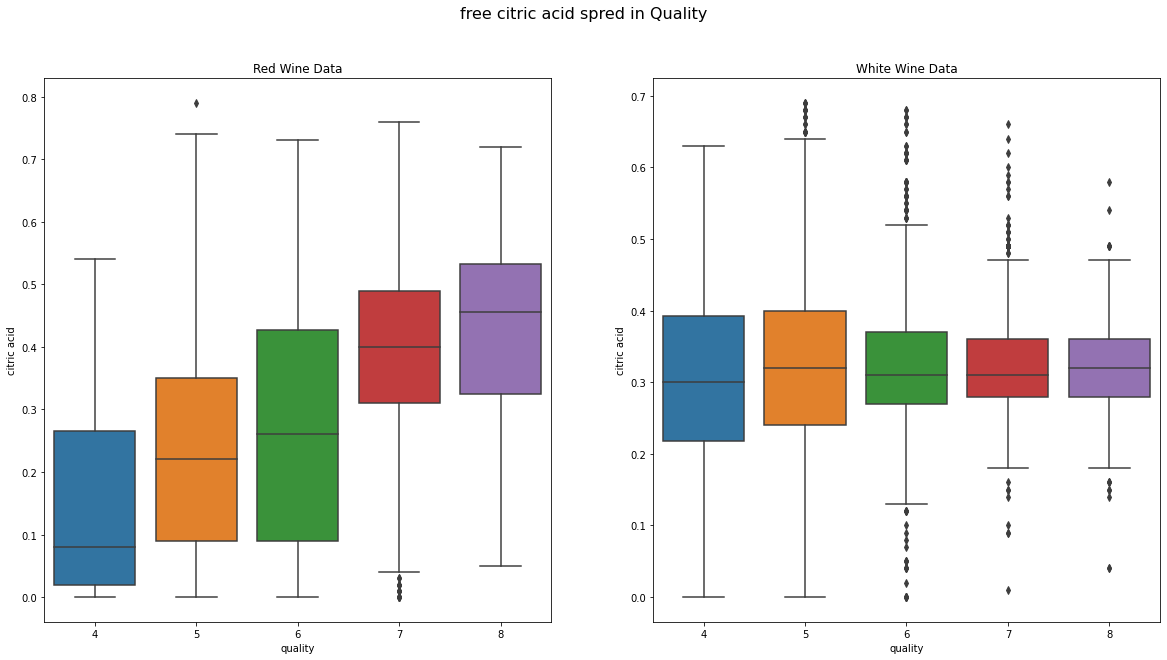

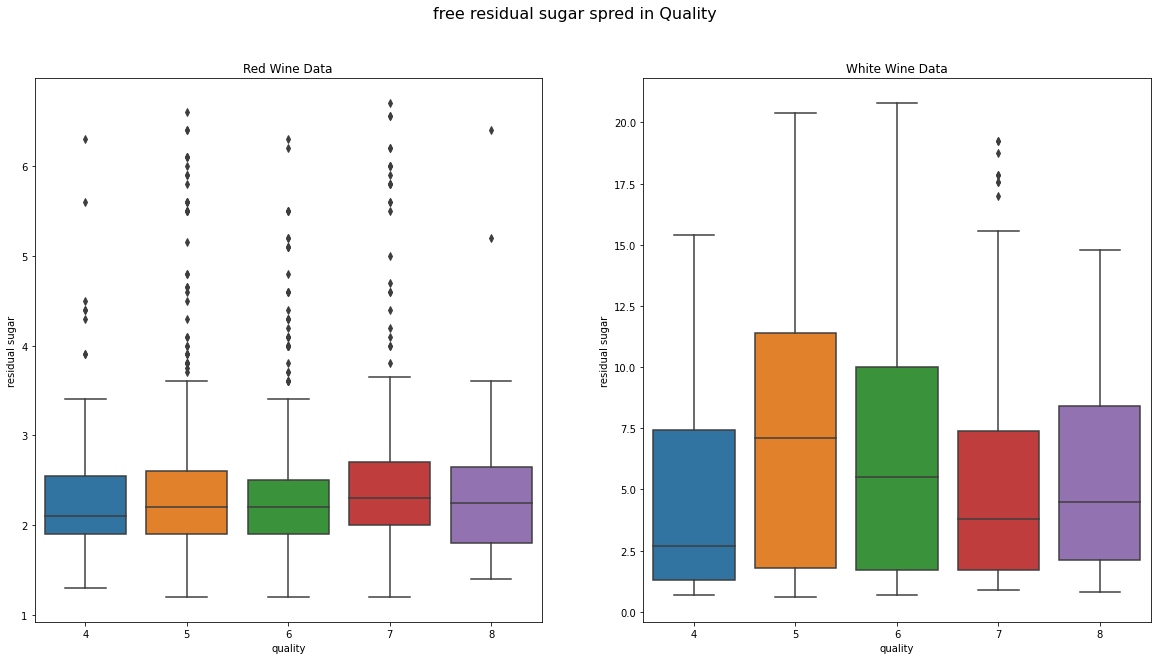

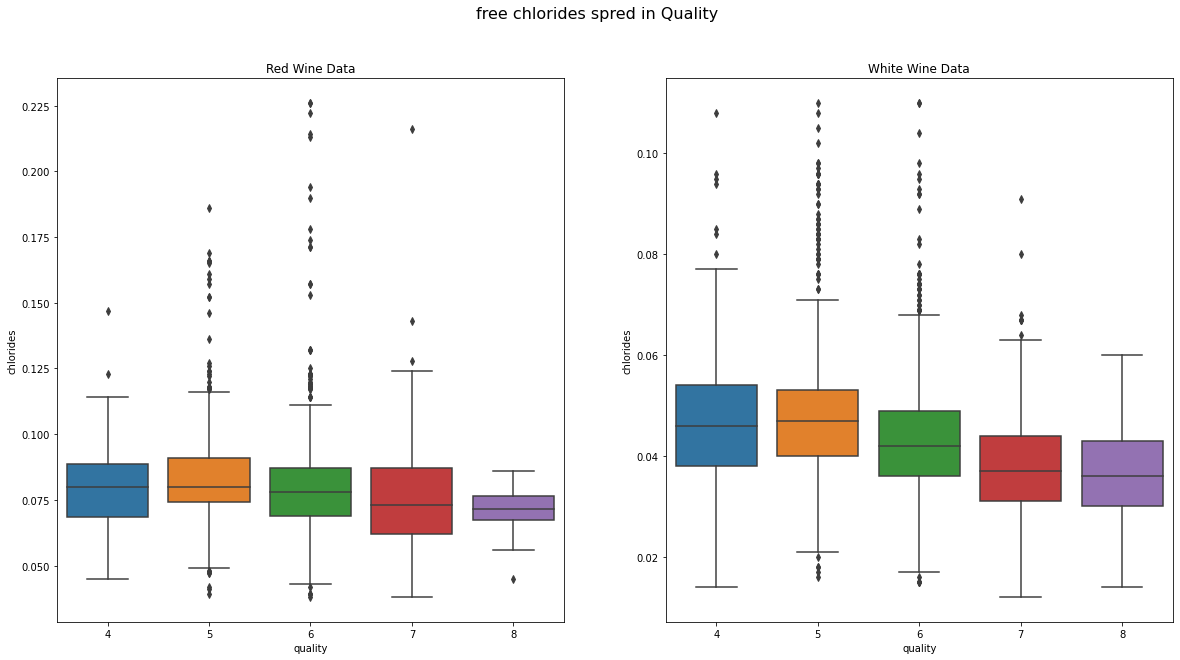

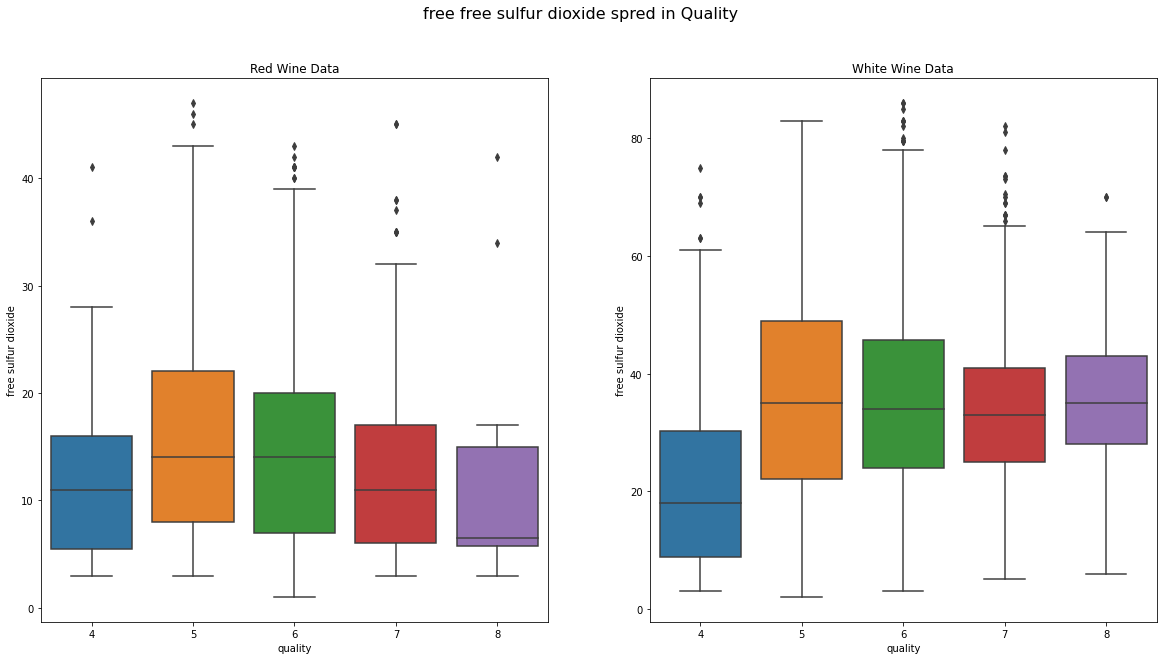

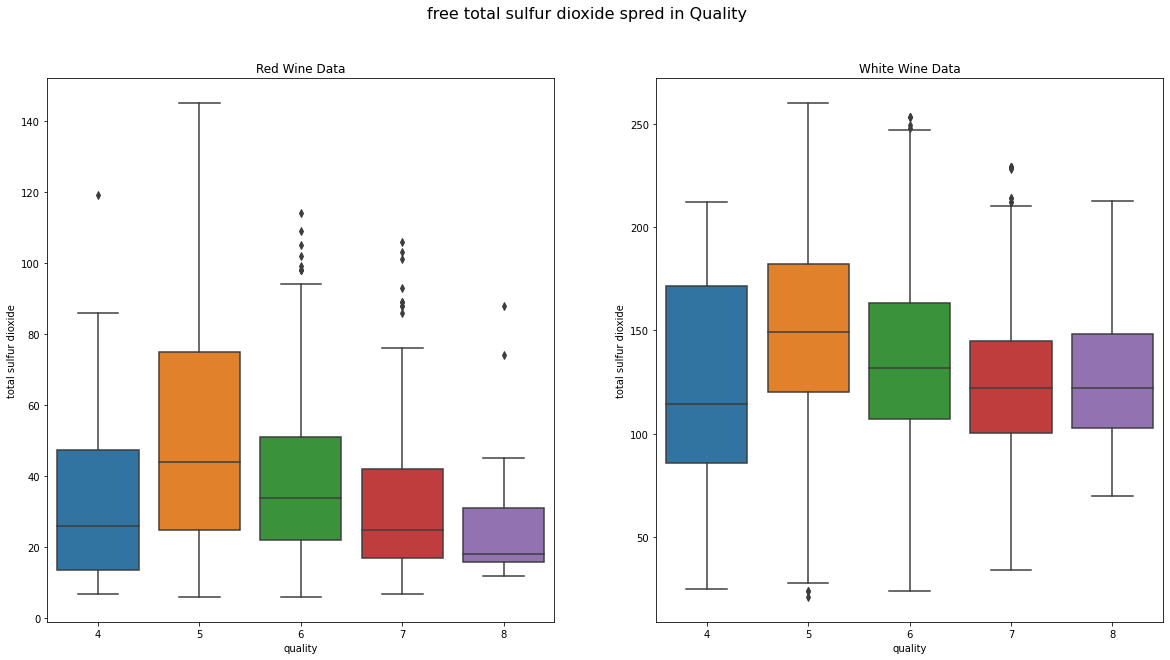

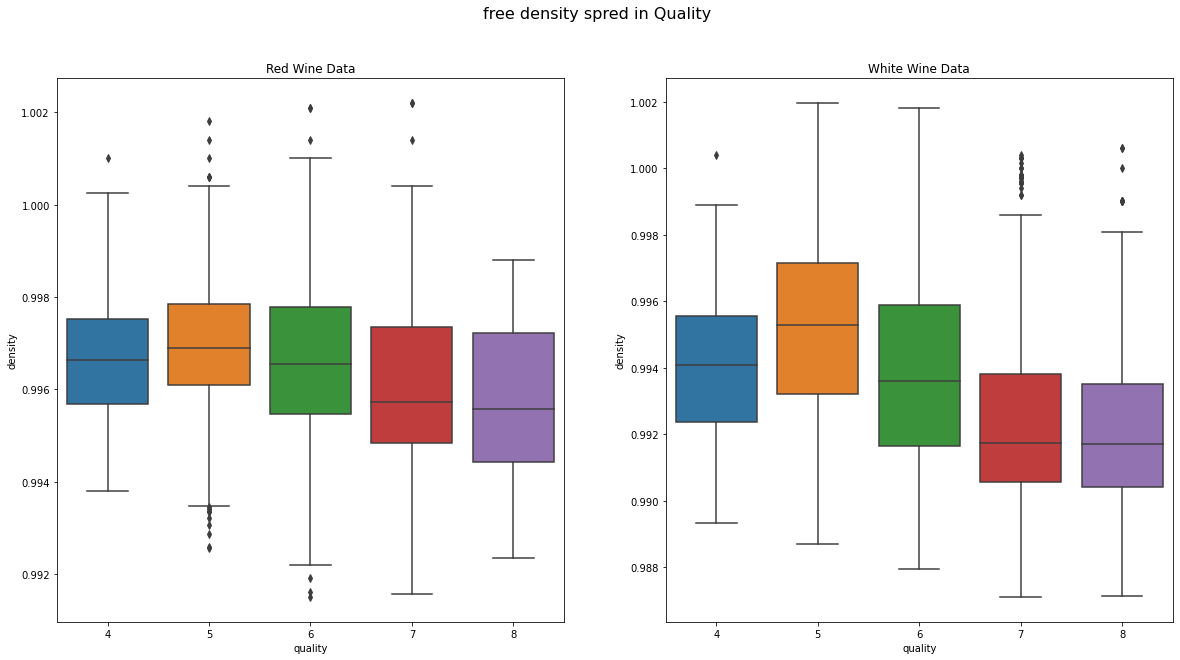

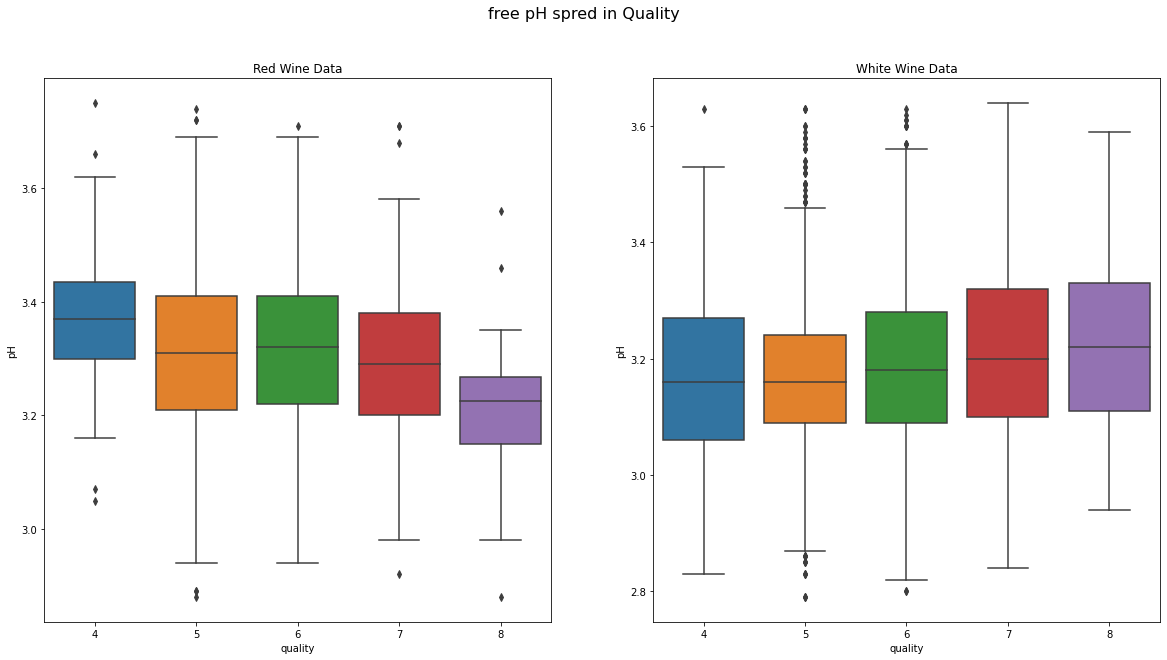

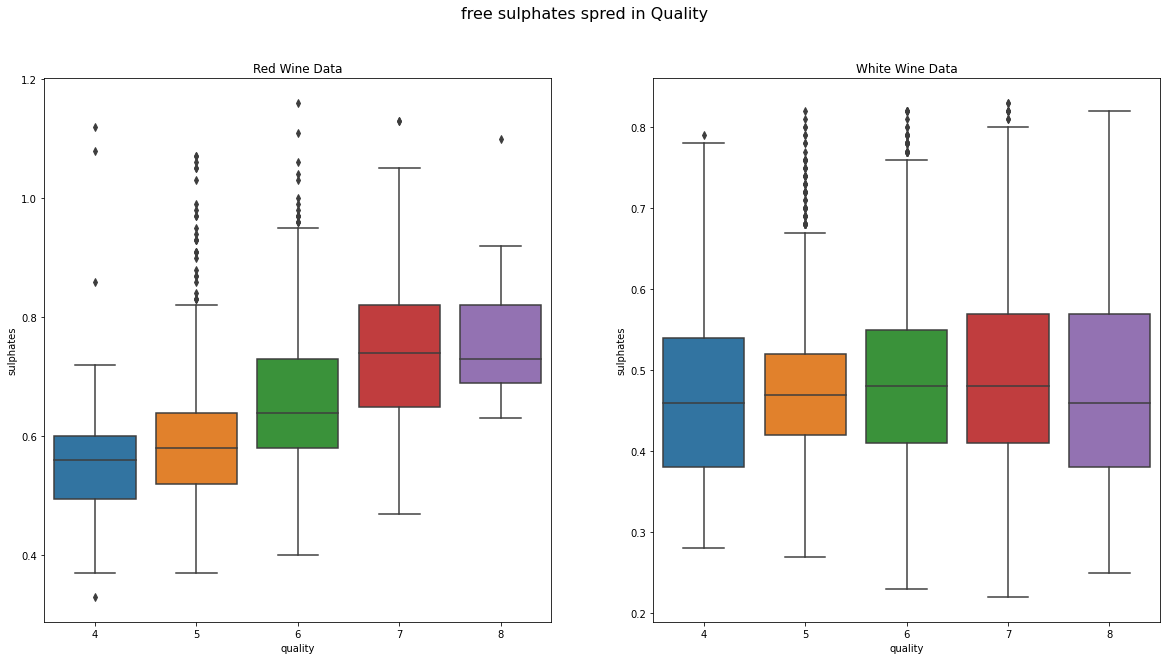

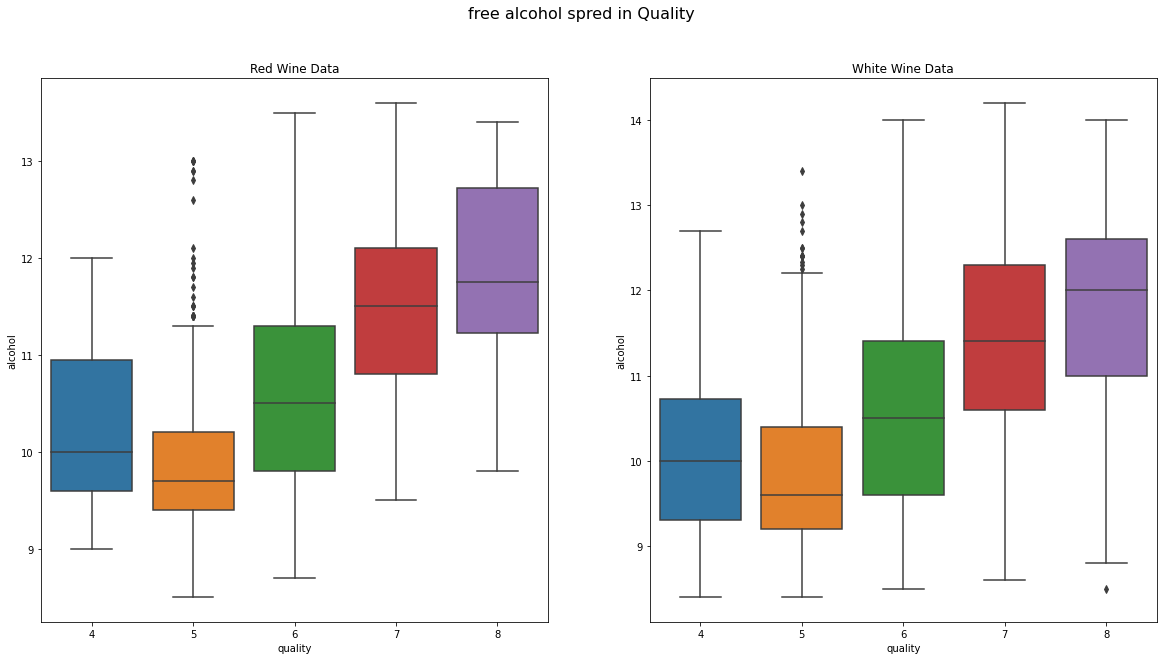

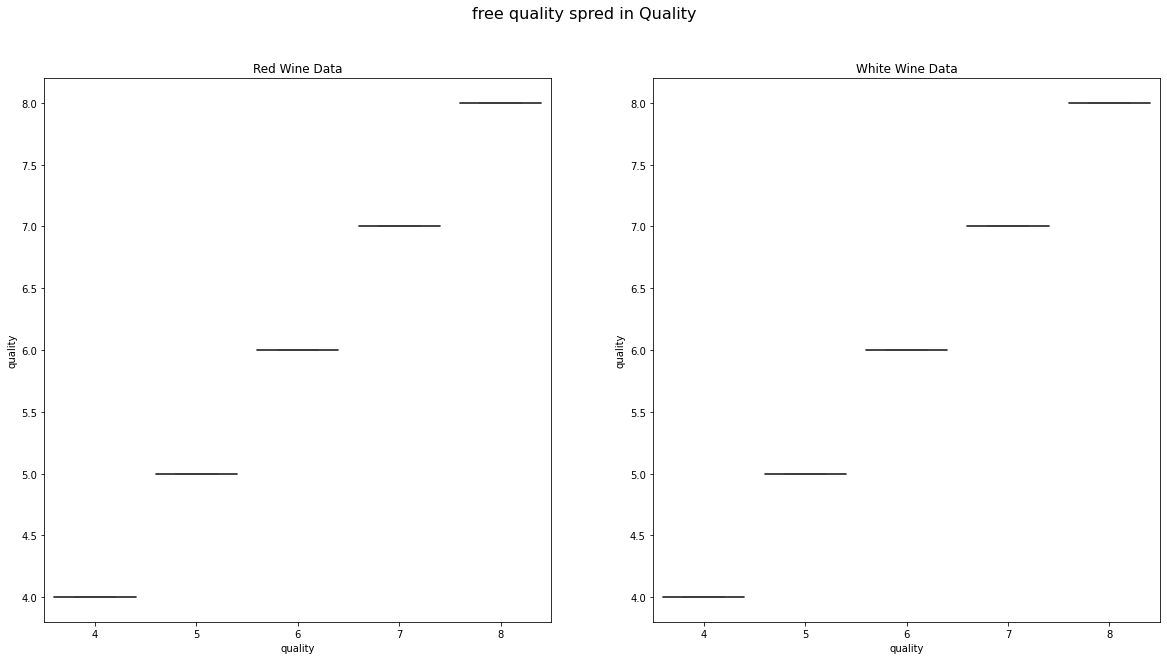

In [ ]:
for i in df_red.columns:
  fig, ax = plt.subplots(1,2, figsize=(20,10))
  sns.boxplot(x= 'quality',y= i ,data=df_red, ax=ax[0])
  sns.boxplot(x ='quality',y= i ,data=df_white, ax=ax[1])
  ax[0].set_title('Red Wine Data')
  ax[1].set_title('White Wine Data')
  fig.suptitle("free {} spred in Quality".format(i), fontsize=16)
  plt.show()

$\large\textbf{Defing label and target and Scaling and splitting data into train and test }$

In [ ]:
x_red = np.asarray(df_red.iloc[:, :-1])
y_red = np.asarray(df_red['quality'])

x_white = df_white.iloc[:, :-1]
y_white = df_white['quality']

#print(x_red.shape, y_red.shape)
#print(x_white.shape, y_white.shape)

scaler = StandardScaler()

x_red = scaler.fit_transform(x_red)
x_white = scaler.fit_transform(x_white)

x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(x_red, y_red, test_size=0.2)
x_white_train, x_white_test, y_white_train, y_white_test = train_test_split(x_white, y_white, test_size=0.2)


$\large\textbf{Lasso Regression (Red Wine)}$

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


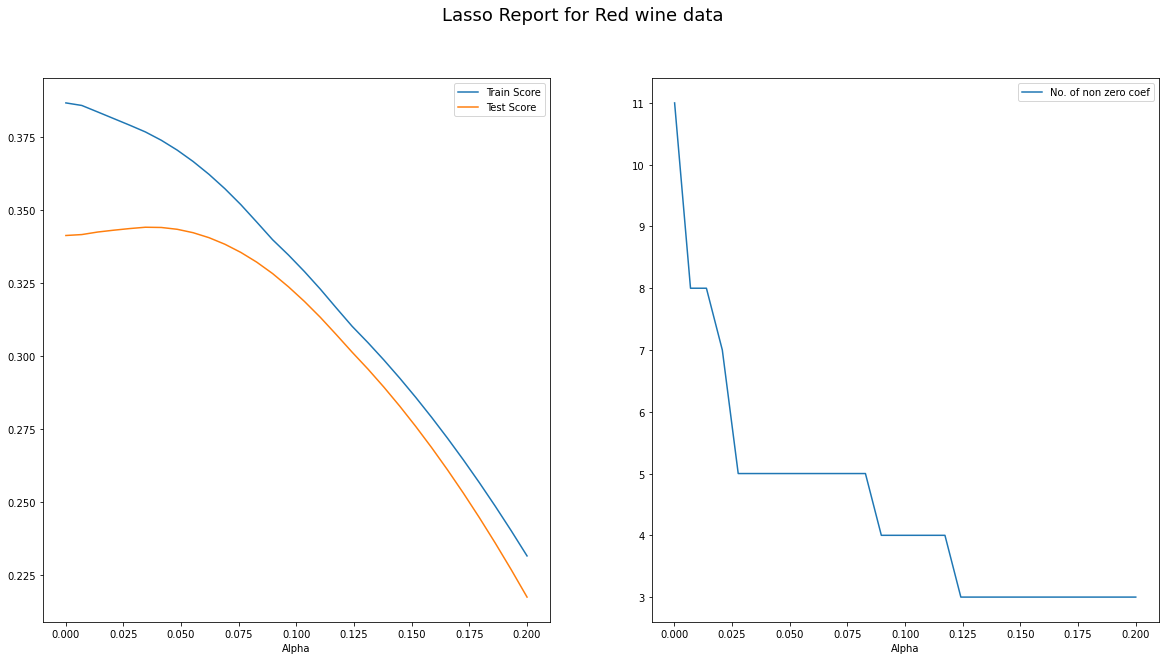

In [ ]:
from sklearn.linear_model import Lasso


alpha_arr = np.linspace(0.0001,0.2,30)
coef_arr = []
train_score =[]
test_score = []
number_of_nonzero_coef = [] 

for val in alpha_arr:
  lassoreg = Lasso(alpha=val).fit(x_red_train,y_red_train)
  coef_arr.append(lassoreg.coef_)
  train_score.append(lassoreg.score(x_red_train,y_red_train))
  test_score.append(lassoreg.score(x_red_test,y_red_test))
  number_of_nonzero_coef.append(np.sum(lassoreg.coef_ != 0))



fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.lineplot(alpha_arr,train_score, label ='Train Score', ax=ax[0])
sns.lineplot(alpha_arr,test_score, label='Test Score',ax=ax[0])
sns.lineplot(alpha_arr,number_of_nonzero_coef, label='No. of non zero coef',ax=ax[1])
ax[0].set_xlabel('Alpha')
ax[1].set_xlabel('Alpha')
fig.suptitle('Lasso Report for Red wine data', fontsize=18)
plt.show()



***Remarks :*** *We observe that the training $R^2$ and the test $R^2$ both decreases as we increase the value of $\alpha$ which is the regularizatin parameter. But we also observe that around the value of 0.25, the test score does not change much and then start to decline. So we choose this value $\alpha$ to fit the model and then calculate the results*

In [ ]:
cross_score_red = cross_val_score(Lasso(alpha=0.025),x_red_train,y_red_train,cv=30)
cross_score_red.mean()

lassoreg_red = Lasso(alpha=0.025).fit(x_red_train,y_red_train)

print('R^2 Training : ', lassoreg_red.score(x_red_train,y_red_train))
print('R^2 Test : ', lassoreg_red.score(x_red_test,y_red_test))
print('Coefficients of Lasso :' , lassoreg_red.coef_)




R^2 Training :  0.37975675115601365
R^2 Test :  0.3432402734321428
Coefficients of Lasso : [ 0.         -0.1027424   0.         -0.         -0.0007768   0.
 -0.07310473 -0.         -0.06061953  0.15864648  0.30928348]


$\large\textbf{Lasso Regression (White Wine)}$

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


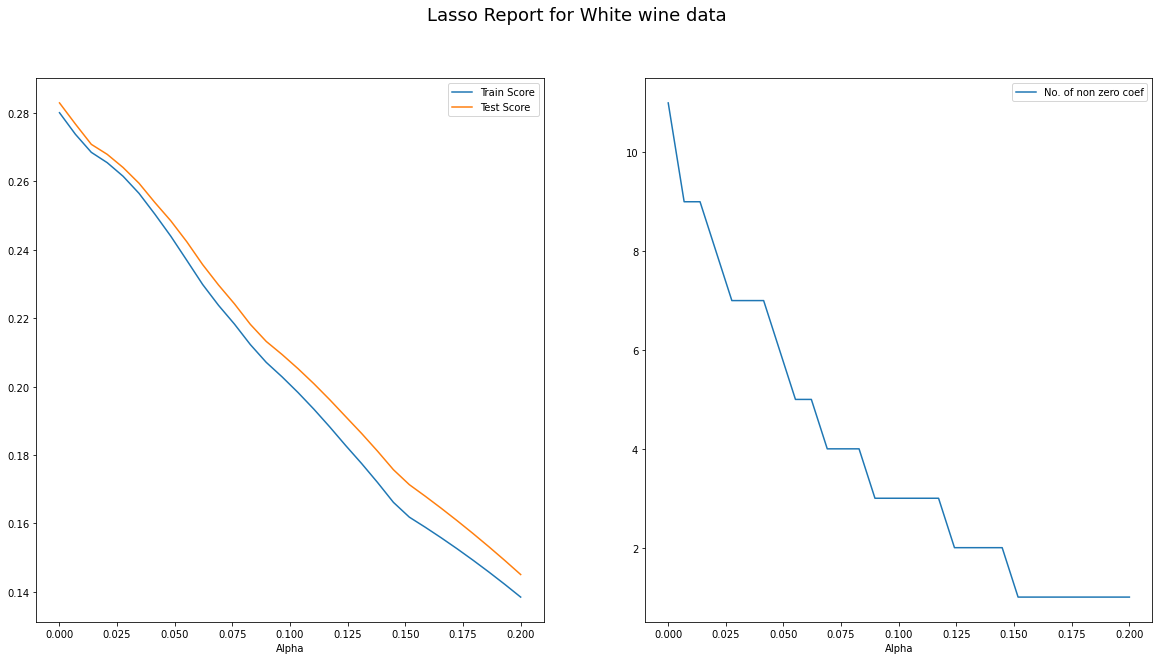

In [ ]:
from sklearn.linear_model import Lasso


alpha_arr = np.linspace(0.0001,0.2,30)
coef_arr = []
train_score =[]
test_score = []
number_of_nonzero_coef = [] 

for val in alpha_arr:
  lassoreg = Lasso(alpha=val).fit(x_white_train,y_white_train)
  coef_arr.append(lassoreg.coef_)
  train_score.append(lassoreg.score(x_white_train,y_white_train))
  test_score.append(lassoreg.score(x_white_test,y_white_test))
  number_of_nonzero_coef.append(np.sum(lassoreg.coef_ != 0))



fig, ax = plt.subplots(1,2, figsize=(20,10))

sns.lineplot(alpha_arr,train_score, label ='Train Score', ax=ax[0])
sns.lineplot(alpha_arr,test_score, label='Test Score',ax=ax[0])
sns.lineplot(alpha_arr,number_of_nonzero_coef, label='No. of non zero coef',ax=ax[1])
ax[0].set_xlabel('Alpha')
ax[1].set_xlabel('Alpha')
fig.suptitle('Lasso Report for White wine data', fontsize=18)
plt.show()



In [ ]:


lassoreg_white = Lasso(alpha=0.00001).fit(x_white_train,y_white_train)

#print('R^2 Training : ', lassoreg_white.score(x_white_train,y_white_train))
#print('R^2 Test : ', lassoreg_white.score(x_white_test,y_white_test))
#print('Coefficients of Lasso :' , lassoreg_white.coef_)

y_predic_white = lassoreg_white.predict(x_white_test)

y_predic_int_white = np.around(y_predic_white)


print('Score on float (R^2 Score) :', r2_score(y_white_test,y_predic_white))

print('Score on Integers (Accuracy) :', accuracy_score(y_white_test,y_predic_int_white))






Score on float (R^2 Score) : 0.2829599157235082
Score on Integers (Accuracy) : 0.5077951002227171


$\large\textbf{Using Red wine model to test white wine quality and vice-versa}$

In [ ]:
print('Score of White data using Red wine Model : ',lassoreg_red.score(x_white_test,y_white_test))
print('Score of Red data using White wine Model : ',lassoreg_white.score(x_red_test,y_red_test))


Score of White data using Red wine Model :  0.10459822337712588
Score of Red data using White wine Model :  -0.3739375747114688


***We observe that the score is very lowe when we test on different model and even negative in case of white model***

$\large\textbf{Random Forest (Red wine data)}$

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_red_train,y_red_train)

y_red_rf_pred = rf.predict(x_red_test)

print('Cross-val score :', cross_val_score(rf,x_red_train,y_red_train).mean())
print('Score on test Data (Accuracy) :',accuracy_score(y_red_test,y_red_rf_pred.round()))




Cross-val score : 0.43410341514544265
Score on test Data (Accuracy) : 0.7079037800687286


$\large\textbf{Random Forest (White wine data)}$

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=100)

rf.fit(x_white_train,y_white_train)

y_white_rf_pred = rf.predict(x_white_test)

print('Cross-val score :', cross_val_score(rf,x_white_train,y_white_train).mean())
print('Score on test Data (Accuracy) :',accuracy_score(y_white_test,y_white_rf_pred.round()))




Cross-val score : 0.5000441100908909
Score on test Data (Accuracy) : 0.6870824053452116


$\large\textbf{Support vector machine (Red wine data)}$

In [ ]:
from sklearn.svm import SVC

svc = GridSearchCV(SVC(),{'kernel':['rbf','linear'], 'C' : [.01,.1,1,10], 'gamma' : [.001,.01,.1]})
svc.fit(x_red_train,y_red_train)

svc.best_params_

print('Cross val score :', cross_val_score(svc,x_red_train,y_red_train, cv=10).mean())


Cross val score : 0.6344827586206897


In [ ]:
y_predic_svc_red = svc.predict(x_red_test)

print('Score on testing data :',accuracy_score(y_red_test, y_predic_svc_red.round()))

Score on testing data : 0.5876288659793815


$\large\textbf{Support vector machine (White wine data)}$

In [ ]:
from sklearn.svm import SVC

svc = GridSearchCV(SVC(),{'kernel':['rbf','linear'], 'C' : [.01,.1,1,10], 'gamma' : [.001,.01,.1]})
svc.fit(x_white_train,y_white_train)

svc.best_params_

print('Cross val score :', cross_val_score(svc,x_white_train,y_white_train, cv=10).mean())


y_predic_svc_white = svc.predict(x_white_test)

print('Score on testing data :',accuracy_score(y_white_test, y_predic_svc_white.round()))


Cross val score : 0.5923631751762344
Score on testing data : 0.6080178173719376
